Loan Application Status Prediction
Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:

    https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import statistics as stat

In [2]:
df=pd.read_csv('Loan Application Status Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

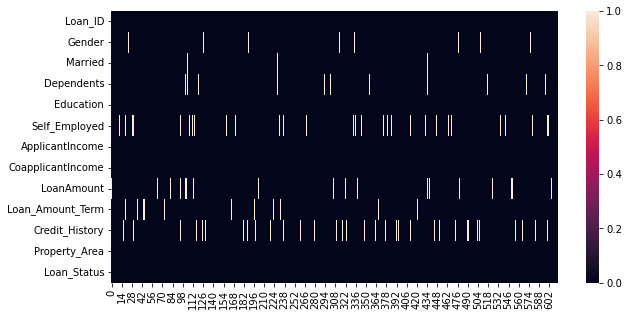

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull().transpose())

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
for i in df.select_dtypes(['object']).columns:
    print(i,':',df[i].unique())

Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

# Removing Null Values

In [9]:
df['LoanAmount']=df['LoanAmount'].replace(np.nan,np.mean(df['LoanAmount']))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,stat.mode(df['Loan_Amount_Term']))
df.drop('Loan_ID',axis=1,inplace=True)
df=df.dropna()

<AxesSubplot:>

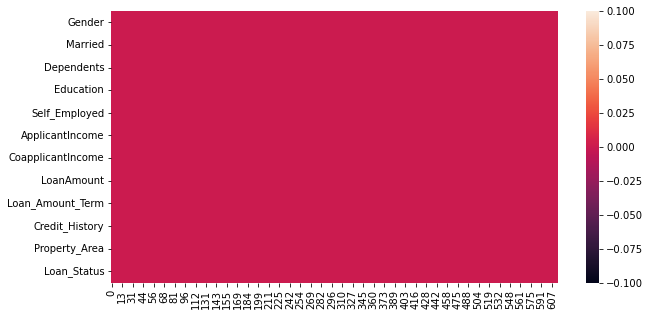

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull().transpose())

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

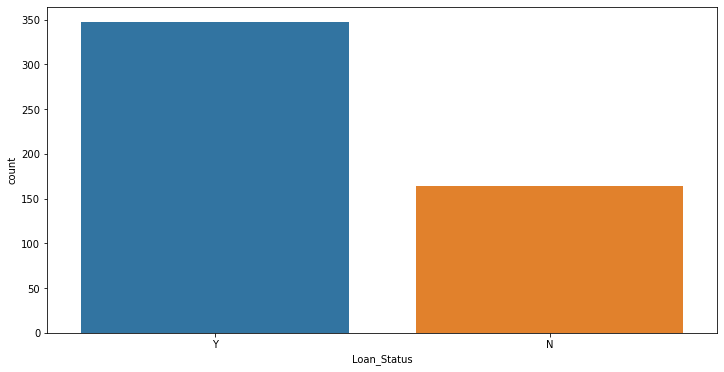

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Loan_Status',data=df)

# Graphical Relation

<AxesSubplot:xlabel='Dependents', ylabel='count'>

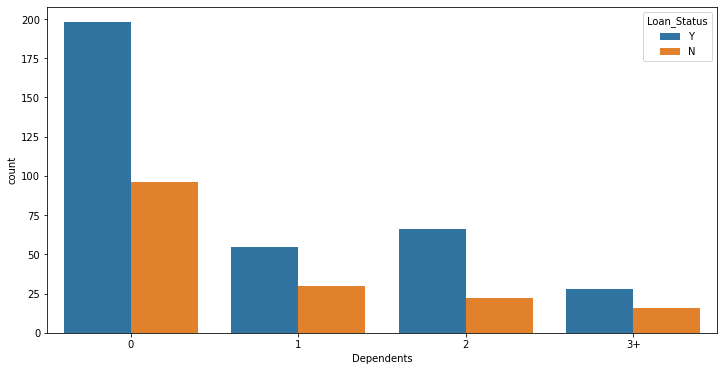

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

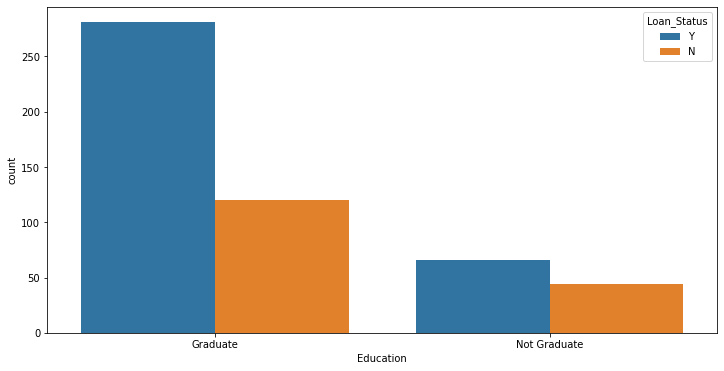

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

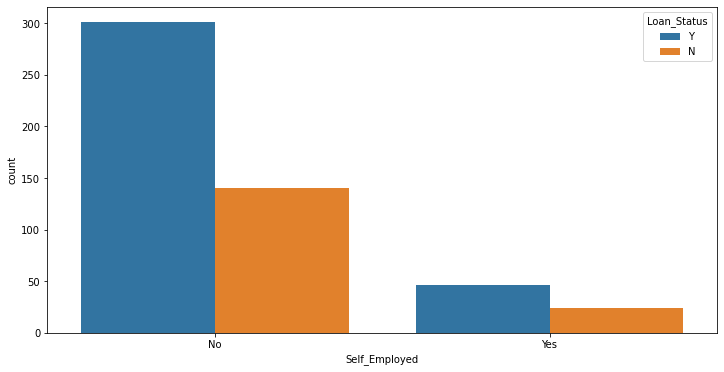

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

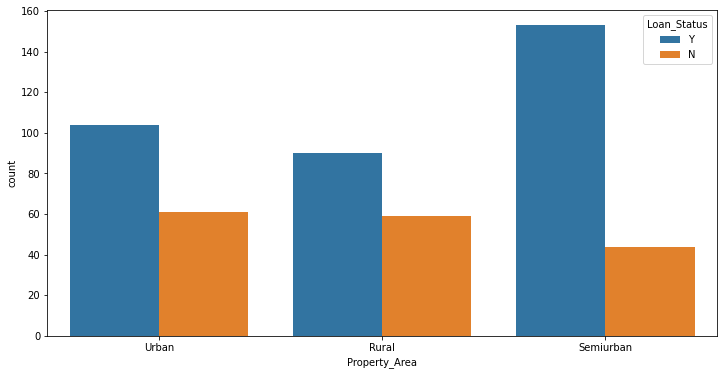

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

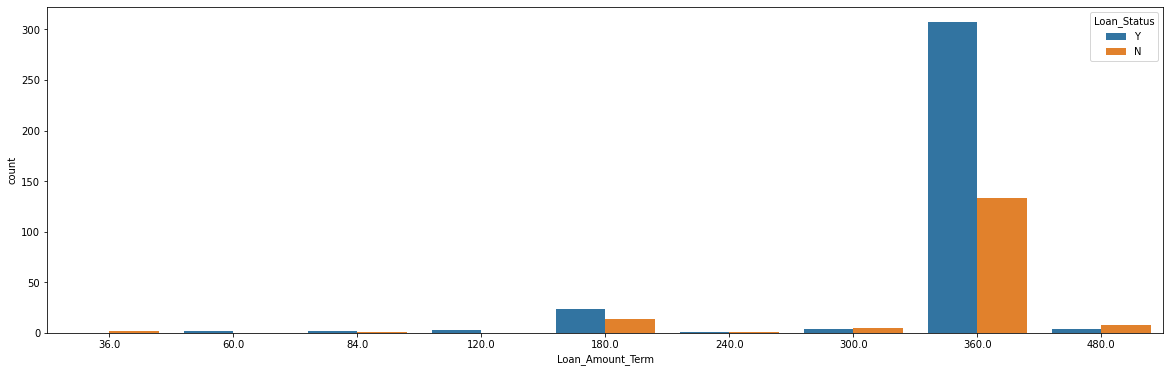

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

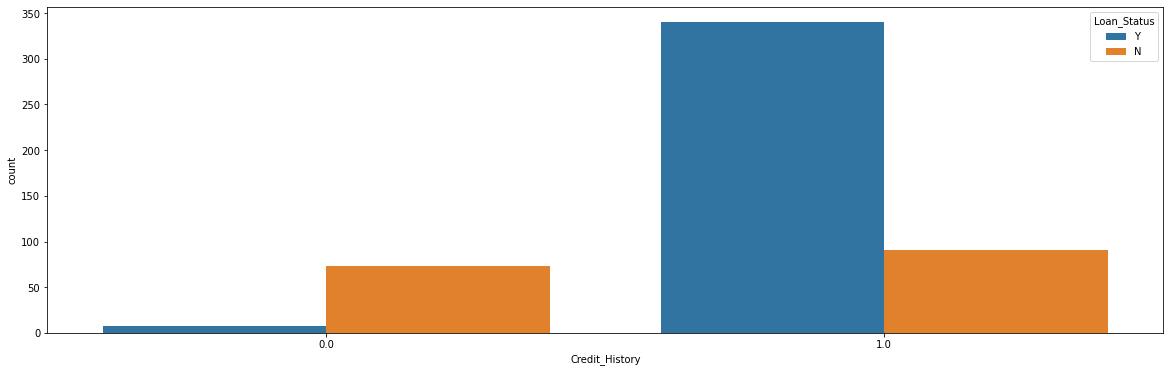

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

# Applying LevelEncoder
Columns having Datatypes as 'object' :

In [18]:
df.select_dtypes(['object']).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
col=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
for i in col:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

# Converting 'float' to 'int'
df['Credit_History'] = df['Credit_History'].astype(int)

In [20]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1,2,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0,1,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1,2,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1,1,0


In [21]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.821918,0.64775,0.769080,0.215264,0.136986,5308.146771,1561.997886,144.220804,342.434442,0.843444,1.031311,0.679061
std,0.382957,0.47814,1.020142,0.411408,0.344170,5561.209487,2559.383166,78.266321,64.150735,0.363738,0.784031,0.467295
min,0.000000,0.00000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000,0.000000,2885.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.00000,0.000000,0.000000,0.000000,3858.000000,1086.000000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.00000,2.000000,0.000000,0.000000,5820.000000,2253.500000,165.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.00000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


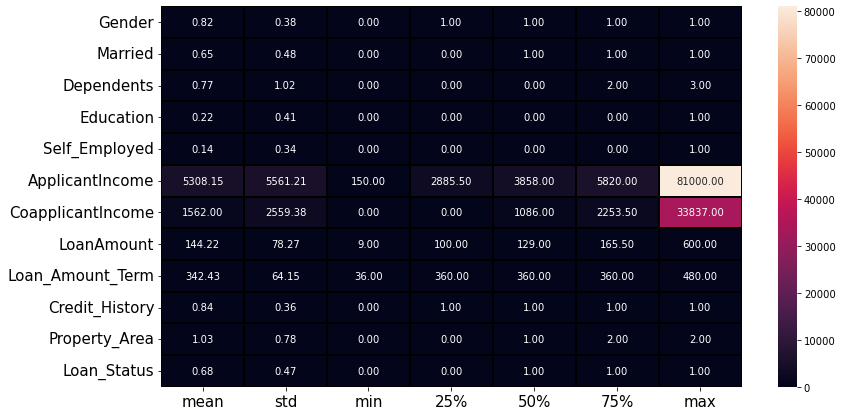

In [22]:
plt.figure(figsize=(13,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [23]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.363499,0.200692,0.044667,-0.007948,0.035377,0.157993,0.102137,-0.089269,0.024682,-0.020576,0.052533
Married,0.363499,1.000000,0.375597,-0.002516,0.019750,0.040226,0.107327,0.181882,-0.110834,0.020519,0.029479,0.098560
Dependents,0.200692,0.375597,1.000000,0.039250,0.051180,0.124717,-0.010586,0.168145,-0.102012,-0.039492,-0.000748,0.016984
Education,0.044667,-0.002516,0.039250,1.000000,-0.014796,-0.142747,-0.067085,-0.171444,-0.107860,-0.075720,-0.033095,-0.088699
Self_Employed,-0.007948,0.019750,0.051180,-0.014796,1.000000,0.167491,-0.012554,0.115941,-0.029343,-0.016306,-0.052259,-0.018705
ApplicantIncome,0.035377,0.040226,0.124717,-0.142747,0.167491,1.000000,-0.114302,0.490153,-0.009024,-0.044954,-0.066311,-0.042166
CoapplicantIncome,0.157993,0.107327,-0.010586,-0.067085,-0.012554,-0.114302,1.000000,0.192269,-0.009057,0.000391,0.000368,-0.039323
LoanAmount,0.102137,0.181882,0.168145,-0.171444,0.115941,0.490153,0.192269,1.000000,0.047917,-0.027274,-0.113254,-0.062882
Loan_Amount_Term,-0.089269,-0.110834,-0.102012,-0.107860,-0.029343,-0.009024,-0.009057,0.047917,1.000000,0.018046,-0.066233,0.001521
Credit_History,0.024682,0.020519,-0.039492,-0.075720,-0.016306,-0.044954,0.000391,-0.027274,0.018046,1.000000,-0.003404,0.545934


<AxesSubplot:>

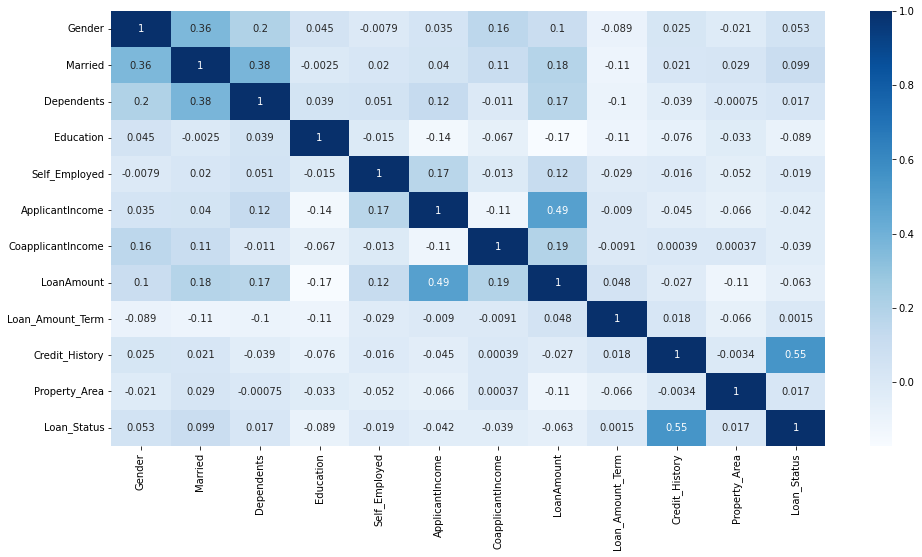

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [25]:
df.corr()['Loan_Status']

Gender               0.052533
Married              0.098560
Dependents           0.016984
Education           -0.088699
Self_Employed       -0.018705
ApplicantIncome     -0.042166
CoapplicantIncome   -0.039323
LoanAmount          -0.062882
Loan_Amount_Term     0.001521
Credit_History       0.545934
Property_Area        0.016778
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

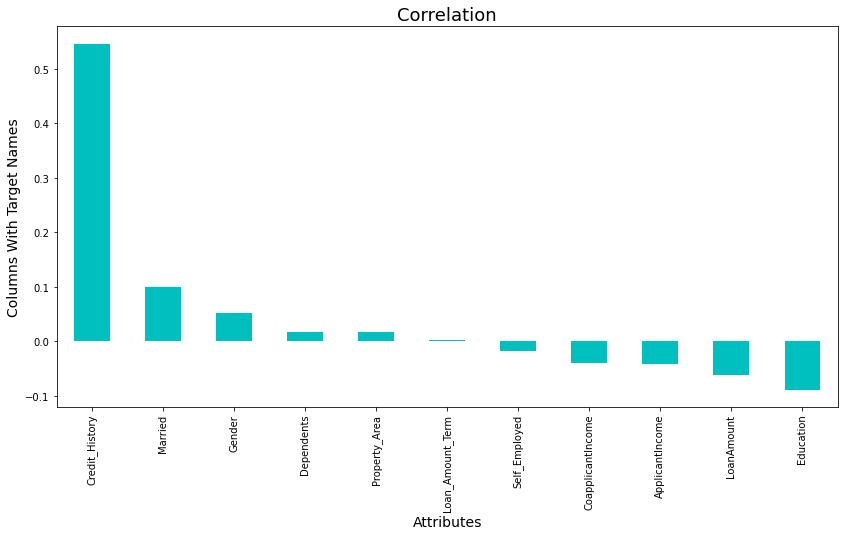

In [26]:
plt.figure(figsize=(14,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Attributes',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Outliers

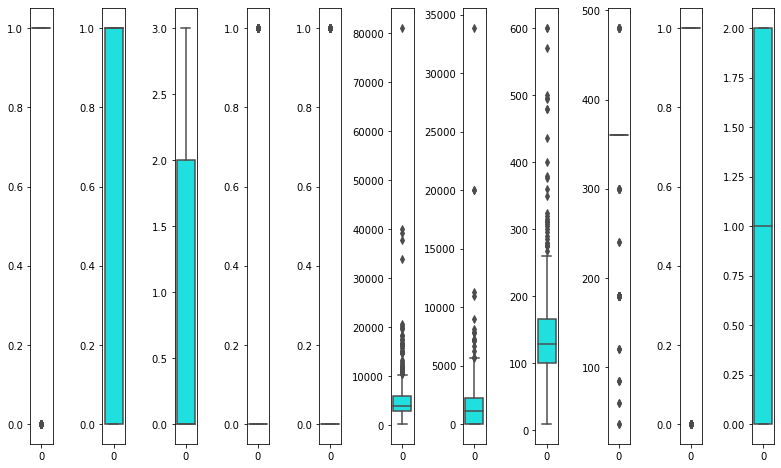

In [27]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='cyan',orient='v')
    plt.tight_layout()

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,:11]))
z.shape

(511, 11)

In [29]:
threshold=3
np.where(z>3)

(array([  9,  13,  60,  83, 110, 132, 132, 150, 150, 155, 157, 204, 222,
        237, 263, 308, 311, 335, 342, 349, 373, 407, 413, 436, 438, 454,
        468, 480, 484, 487, 501], dtype=int64),
 array([6, 8, 8, 8, 8, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 7, 7, 6, 5, 6, 5, 7,
        8, 7, 7, 8, 7, 8, 6, 8, 7], dtype=int64))

In [30]:
len(np.where(z>3)[0])

31

In [31]:
df_new=df[(z<3).all(axis=1)]

In [32]:
x=df_new.drop(['Loan_Status'],axis=1)
y=df_new['Loan_Status']

In [33]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2


# Balancing Data

In [34]:
import sklearn
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_new,y=smt.fit_resample(x,y)
x=pd.DataFrame(x_new,columns=x.columns)

# Min-Max Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_new=scale.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [36]:
x.skew()

Gender              -1.214500
Married             -0.182990
Dependents           1.204683
Education            1.627463
Self_Employed        2.590842
ApplicantIncome      2.093491
CoapplicantIncome    1.230633
LoanAmount           1.065361
Loan_Amount_Term    -1.694785
Credit_History      -0.828117
Property_Area        0.057725
dtype: float64

<AxesSubplot:ylabel='Density'>

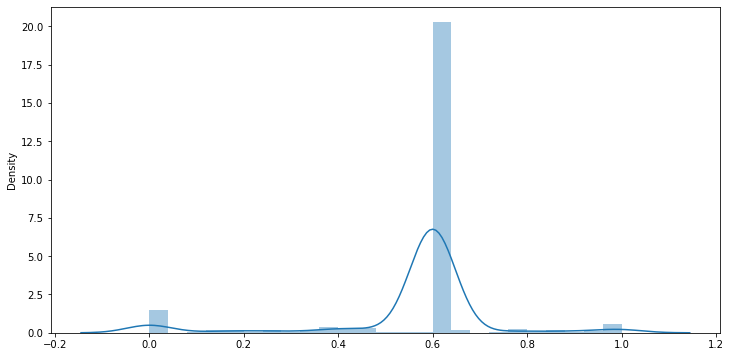

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(x=x['Loan_Amount_Term'])

<AxesSubplot:ylabel='Density'>

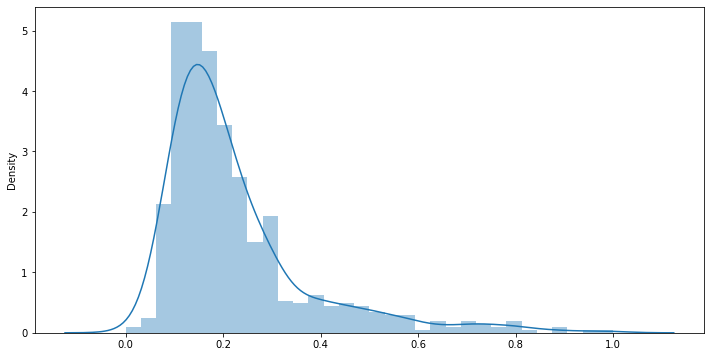

In [38]:
plt.figure(figsize=(12,6))
sns.distplot(x=x['ApplicantIncome'])

<AxesSubplot:ylabel='Density'>

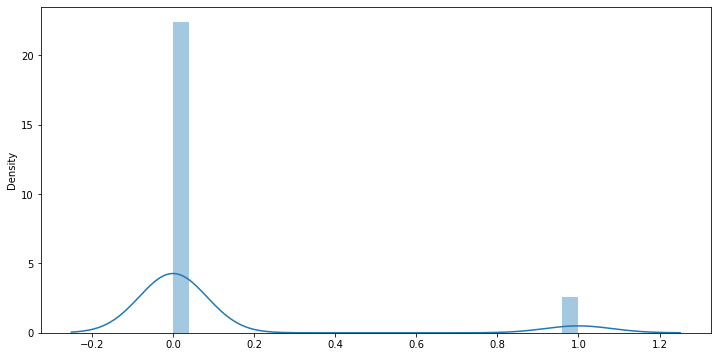

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(x=x['Self_Employed'])

# Transforming Skewness

In [40]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [41]:
x.skew()

Gender              -1.214500
Married             -0.182990
Dependents           0.588276
Education            1.627463
Self_Employed        2.590842
ApplicantIncome      0.167061
CoapplicantIncome    0.239093
LoanAmount          -0.017968
Loan_Amount_Term     0.455564
Credit_History      -0.828117
Property_Area       -0.065621
dtype: float64

In [42]:
x.shape

(660, 11)

# Selecting Best Model

In [43]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    dt.fit(x_train,y_train)
    preddt=dt.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Best accuracy:  87.27272727272727  on Random State:  11
[[68 20]
 [18 59]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        88
           1       0.75      0.77      0.76        77

    accuracy                           0.77       165
   macro avg       0.77      0.77      0.77       165
weighted avg       0.77      0.77      0.77       165



In [45]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7818181818181817


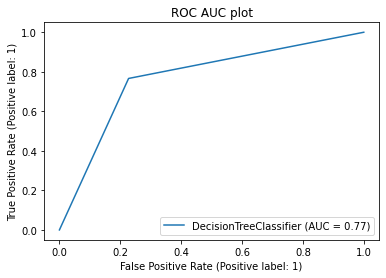

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Best accuracy:  90.30303030303031  on Random State:  67
[[68 20]
 [11 66]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        88
           1       0.77      0.86      0.81        77

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.82      0.81      0.81       165



In [48]:
scr=cross_val_score(rf,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8303030303030303


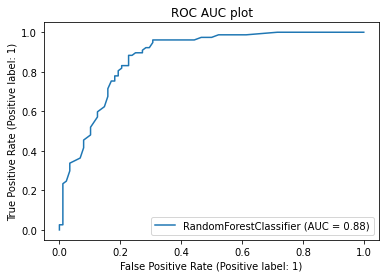

In [49]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# KNeighborsClassifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    kn.fit(x_train,y_train)
    predkn=kn.predict(x_test)
    acc=accuracy_score(y_test,predkn)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Best accuracy:  84.24242424242424  on Random State:  79
[[62 26]
 [13 64]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        88
           1       0.71      0.83      0.77        77

    accuracy                           0.76       165
   macro avg       0.77      0.77      0.76       165
weighted avg       0.77      0.76      0.76       165



In [51]:
scr=cross_val_score(kn,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7651515151515151


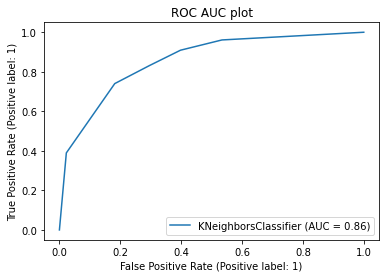

In [52]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(kn,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# SVC

In [53]:
from sklearn.svm import SVC
sv=SVC(kernel='poly')
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    sv.fit(x_train,y_train)
    predsv=sv.predict(x_test)
    acc=accuracy_score(y_test,predsv)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Best accuracy:  85.45454545454545  on Random State:  79
[[60 28]
 [ 7 70]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.77        88
           1       0.71      0.91      0.80        77

    accuracy                           0.79       165
   macro avg       0.80      0.80      0.79       165
weighted avg       0.81      0.79      0.79       165



In [54]:
scr=cross_val_score(sv,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7984848484848486


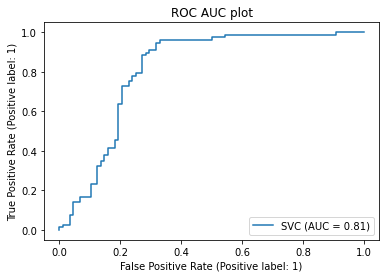

In [55]:
plot_roc_curve(sv,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Best accuracy:  86.66666666666667  on Random State:  83
[[63 25]
 [ 8 69]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.79        88
           1       0.73      0.90      0.81        77

    accuracy                           0.80       165
   macro avg       0.81      0.81      0.80       165
weighted avg       0.82      0.80      0.80       165



In [57]:
scr=cross_val_score(lr,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.803030303030303


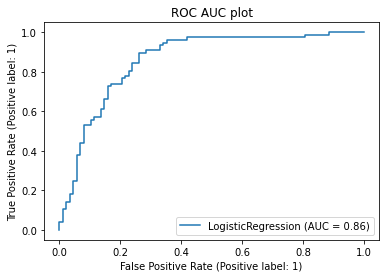

In [58]:
plot_roc_curve(lr,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# Gaussian Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    gn.fit(x_train,y_train)
    predgn=gn.predict(x_test)
    acc=accuracy_score(y_test,predgn)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

Best accuracy:  86.66666666666667  on Random State:  83
[[60 28]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78        88
           1       0.72      0.94      0.81        77

    accuracy                           0.80       165
   macro avg       0.82      0.81      0.80       165
weighted avg       0.83      0.80      0.80       165



In [60]:
scr=cross_val_score(gn,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7954545454545454


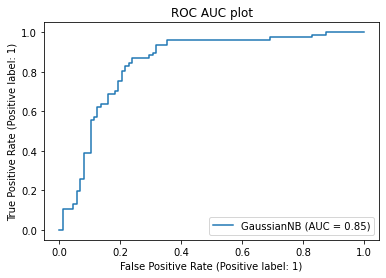

In [61]:
plot_roc_curve(gn,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [62]:
import joblib
joblib.dump(rf,'Census Income Model.pkl')

['Census Income Model.pkl']